[09:30:37] Initializing Normalizer
[09:30:38] Molecule does not have explicit Hs. Consider calling AddHs()
1000it [09:19,  1.79it/s]


[<rdkit.Chem.rdchem.Mol object at 0x1592eb610>, <rdkit.Chem.rdchem.Mol object at 0x1592ea030>, <rdkit.Chem.rdchem.Mol object at 0x1592eb7d0>, <rdkit.Chem.rdchem.Mol object at 0x1592eb450>]


[09:39:59] Initializing MetalDisconnector
[09:39:59] Running MetalDisconnector
[09:39:59] Initializing Normalizer
[09:39:59] Running Normalizer
[09:39:59] Running LargestFragmentChooser
[09:39:59] Fragment: [N]
[09:39:59] New largest fragment: [N] (1)
[09:39:59] Fragment: [O]c1[c][c]c2c(=O)n([C]N3[C][C](c4[c][c][c][c]c4F)[C]3)[c][c]c2n1
[09:39:59] New largest fragment: [O]c1[c][c]c2c(=O)n([C]N3[C][C](c4[c][c][c][c]c4F)[C]3)[c][c]c2n1 (24)
[09:39:59] Running Normalizer
[09:39:59] Running Uncharger
[09:39:59] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 21
[09:39:59] Initializing MetalDisconnector
[09:39:59] Running MetalDisconnector
[09:39:59] Initializing Normalizer
[09:39:59] Running Normalizer
[09:39:59] Running LargestFragmentChooser
[09:39:59] Running Normalizer
[09:39:59] Running Uncharger
[09:39:59] Explicit valence for atom # 9 C, 5, is greater than permitted
[09:39:59] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 20
[09:39:59] Explicit valence for atom # 9 Cl, 5, is gr

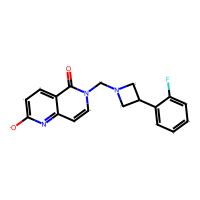

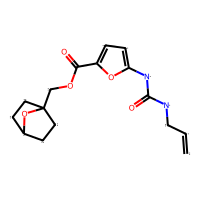

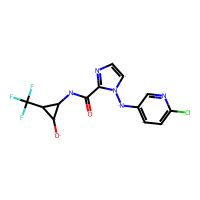

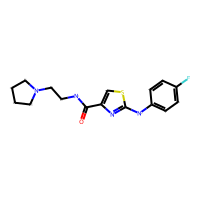

Our Tanimoto -  0.5216729640960693
Our Tanimoto - 0.5508381128311157
RDkit Tanimoto - 0.5431803060545576
Our Tanimoto -  0.5653017163276672
Our Tanimoto - 0.5999770760536194
RDkit Tanimoto - 0.5335755618355538
Our Tanimoto -  0.5087102651596069
Our Tanimoto - 0.6001137495040894
RDkit Tanimoto - 0.5027661584131696
Our Tanimoto -  0.5945809483528137
Our Tanimoto - 0.5945809483528137
RDkit Tanimoto - 0.5186572154607463


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [1]:
import py3Dmol

from ml_conformer_generator import MLConformerGenerator
from cheminformatics import evaluate_samples
from rdkit import Chem
from rdkit.Chem import rdDistGeom

from rdkit.Chem import Draw


device = "cpu"
generator = MLConformerGenerator(device=device)


ref_mol = Chem.MolFromSmiles("CCc1noc(C)c1C(=O)NNC(=O)COc1ccccc1C")
rdDistGeom.EmbedMolecule(ref_mol, forceTol=0.001, randomSeed=12)

samples = generator.generate_conformers(reference_conformer=ref_mol, n_samples=10)
print(samples)

for sample in samples:
    smi = Chem.MolFromSmiles(Chem.MolToSmiles(sample))
    img = Draw.MolToImage(smi, size=(200, 200))
    display(img)
    
_, std_samples = evaluate_samples(ref_mol, samples)

view = py3Dmol.view(width=400, height=300, viewergrid=(2,2))

for sample in std_samples:
    view.addModel(sample['mol_block'], 'mol')
    view.setStyle({'stick': {}})
    view.zoomTo()

view.show()